In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn for machine learning
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('Data/finalists_cleaned.csv')

In [3]:
# Binary classification: 1 = Top 10, 0 = Not Top 10
df['top_10'] = df['final_place'].apply(lambda x: 1 if x <= 10 else 0)

In [4]:
features = [
    'final_draw_position',
    'final_televote_points', 'final_jury_points',
    'final_televote_votes', 'final_jury_votes'
]
X = df[features]
y = df['top_10']

In [5]:
print("Missing values BEFORE fillna:")
print(X.isnull().sum())

X = X.fillna(X.mean())  # Fill missing values

print("Missing values AFTER fillna:")
print(X.isnull().sum())

Missing values BEFORE fillna:
final_draw_position        0
final_televote_points     32
final_jury_points         32
final_televote_votes     128
final_jury_votes         128
dtype: int64
Missing values AFTER fillna:
final_draw_position      0
final_televote_points    0
final_jury_points        0
final_televote_votes     0
final_jury_votes         0
dtype: int64


In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [7]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.93      0.80      0.86        35

    accuracy                           0.88        72
   macro avg       0.88      0.87      0.87        72
weighted avg       0.88      0.88      0.87        72



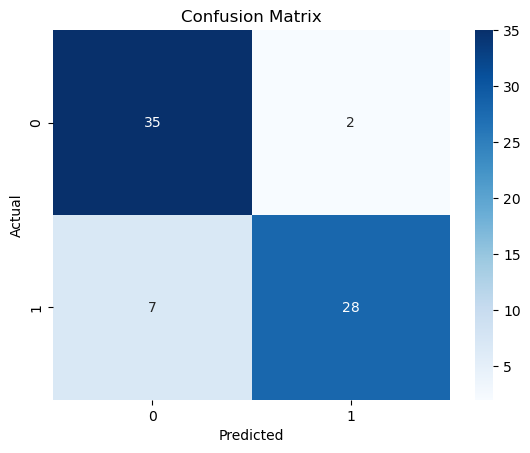

In [8]:
y_pred = model.predict(X_test)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
sample = [[2, 0, 13, 10, 0]]  # year, draw, televote pts, jury pts, televote count, jury count
prediction = model.predict(sample)
print("Top 10 prediction:", "Yes" if prediction[0] == 1 else "No")

Top 10 prediction: No


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [10]:
import joblib

In [11]:
# Store the model in a file
model_file = 'Models/bayes.pkl'

In [12]:
joblib.dump(model, model_file)

['Models/bayes.pkl']